In [30]:
# import libraries
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
import pickle
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [31]:
# read file
df_original=pd.read_csv("test_data.csv")

df =df_original
df.head()

,Level,Salary
0,9,500000
1,10,1000000
2,2,50000


In [32]:
# separate labels and features
x_test=df.iloc[:,:-1].values
y_test=df.iloc[:,1].values

In [33]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x_test = sc_x.fit_transform(x_test.reshape(-1, 1) )
y_test = sc_y.fit_transform(y_test.reshape(-1, 1) )

In [34]:
# reading the pickle file

fileObject = open('train_data.pkl','rb')  
regressor = pickle.load(fileObject)

Accuracy of test data = 78.37036049380184


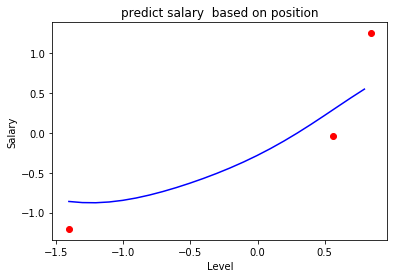

In [35]:
class SVM:
    
    def get_predictions(self,x_test):
        
        # getting the prediction values on train model
        y_pred = regressor.predict(x_test)
        return y_pred
    
    def get_accuracy(self,y_pred,y_test):        

        Accuracy = sklearn.metrics.explained_variance_score(y_test,y_pred)*100
        return Accuracy

    
    def visualize_cvset(self):
        # visualizing the testing set result
        x_grid=np.arange(min(x_test),max(x_test),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x_test,y_test,color='red')
        plt.plot(x_grid,regressor.predict(x_grid),color='blue')
        plt.title('predict salary  based on position')
        plt.xlabel('Level')
        plt.ylabel('Salary')
        plt.show()
    

    
def main():
    # creates class object 
    obj = SVM()
    y_pred=obj.get_predictions(x_test)
    acc_test=obj.get_accuracy(y_pred,y_test)
    print("Accuracy of test data =",acc_test)
    
    obj.visualize_cvset()
if __name__ == '__main__':
    main()
    
